# Project 3: House Price Prediction (Regression) 🏠

**Project Objective:** To build a regression model that accurately predicts the sale price of houses based on a large number of features. This project will cover the complete machine learning workflow, from deep EDA to advanced preprocessing, feature engineering, model training, and evaluation.


### Core Concepts We'll Cover:
1.  **Regression vs. Classification:** Understanding the goal of predicting a continuous value.
2.  **Target Variable Analysis:** Analyzing the distribution of `SalePrice` and applying transformations (log transform).
3.  **Advanced Data Preprocessing:** Implementing robust strategies for handling missing values in both numerical and categorical features.
4.  **Feature Engineering:** Creating new, powerful features from the existing data to improve model performance.
5.  **Categorical Encoding:** Differentiating between and applying Label Encoding and One-Hot Encoding.
6.  **Model Building:** Training and comparing a simple baseline model (Linear Regression) with an advanced model (XGBoost).
7.  **Model Evaluation:** Understanding and using key regression metrics (RMSE, MAE, R-squared).

### Step 1: Setup - Importing Libraries and Kaggle API

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import xgboost as xgb
import os

### Step 2: Data Loading via Kaggle API
We will load the data directly from the Kaggle competition. This is the standard and most reliable method for using Kaggle datasets in a cloud environment like Colab.

**Instructions:**
1.  Go to your Kaggle account page ([https://www.kaggle.com/account](https://www.kaggle.com/account)) and click **'Create New Token'** in the API section. This will download a `kaggle.json` file.
2.  Run the code cell below. It will prompt you to upload a file. Select the `kaggle.json` file you just downloaded.

In [87]:
# Install the Kaggle library
!pip install -q kaggle

# Use Colab's file uploader
from google.colab import files
print("Please upload the kaggle.json file you downloaded from your Kaggle account.")
files.upload()

# Create a directory for the Kaggle API configuration
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the required directory
!cp kaggle.json ~/.kaggle/
# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

print("\nKaggle API configured successfully.")

Please upload the kaggle.json file you downloaded from your Kaggle account.


Saving kaggle.json to kaggle (2).json

Kaggle API configured successfully.


In [88]:
# Download the dataset from the 'house-prices-advanced-regression-techniques' competition
!kaggle competitions download -c house-prices-advanced-regression-techniques

# Unzip the downloaded files
!unzip -o house-prices-advanced-regression-techniques.zip

print("\nDataset downloaded and unzipped.")

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               

Dataset downloaded and unzipped.


In [89]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [90]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#You can see here that the index and Id are different each

In [92]:
train_df.set_index('Id',inplace=True)
test_df.set_index('Id',inplace=True)

In [93]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now you can see that index is removed and id is taken as the index

In [94]:
train_df.shape

(1460, 80)

### Step 3: Deep Dive EDA on the Target Variable (`SalePrice`)
The most important variable in our dataset is the one we want to predict. Understanding its characteristics is the first and most critical step in any regression problem.

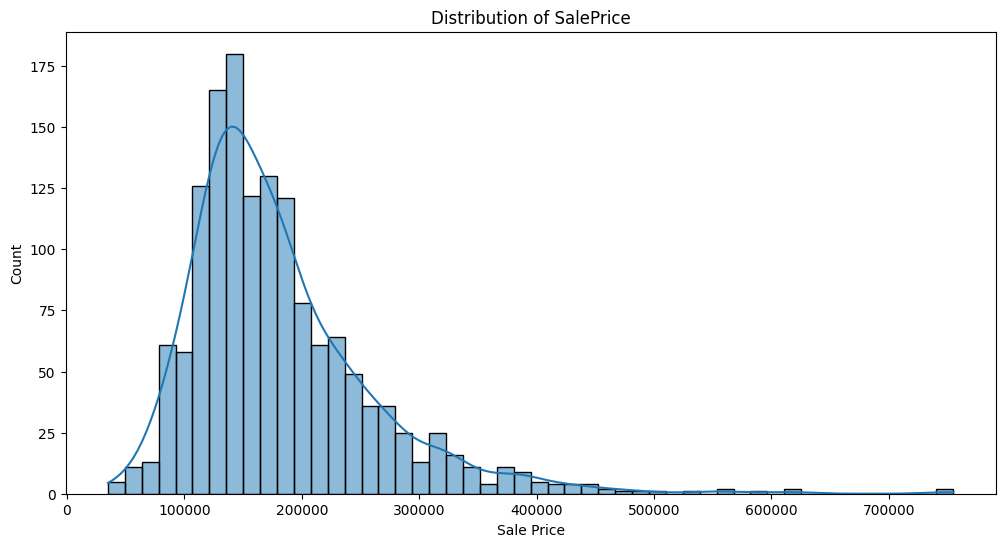

Skewness of SalePrice: 1.8828757597682129


In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.show()

print(f"Skewness of SalePrice: {train_df['SalePrice'].skew()}")

#### **Theoretical Concept: Skewness and Log Transformation**
The distribution of `SalePrice` is **positively skewed** (or right-skewed). This means there's a long tail of very expensive houses, which can negatively impact the performance of some models, especially linear models like Linear Regression. These models often assume that the variables (and especially the residuals of the model) are normally distributed.

To fix this, we can apply a **log transformation** (`np.log1p`, which is `log(1+x)` to handle potential zero values). This transformation compresses the range of large values, making the distribution more symmetrical and closer to a normal distribution.

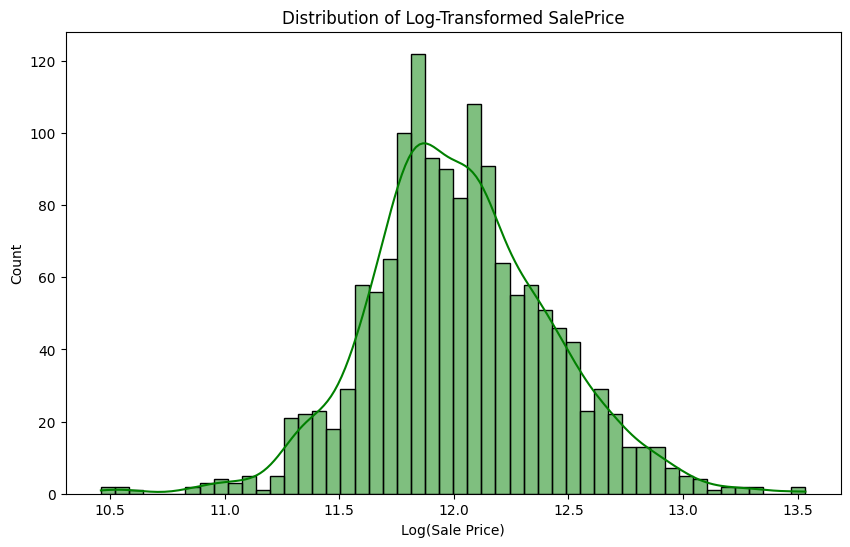

Skewness of Log-Transformed SalePrice: 0.12134661989685333


In [96]:
#As we know that log reduces the number significantly and we saw how big the values are thus we are using that
#The 0data was heavily right skewed and after the log transformation it is at least normalised to an extent
#The regression model works rightly on normalised data only that was the reason for doing so
#we can say the data is normalised from the skew value and also from the curve being drawn
#If I am using linear regression I have to use normal data and for that log transformation is done
#the model would work on skewed data but it would be horrible

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(Sale Price)')
plt.show()

print(f"Skewness of Log-Transformed SalePrice: {train_df['SalePrice'].skew()}")

**Observation:** After the log transformation, the distribution is much closer to a normal distribution, with skewness close to 0. We will build our model to predict the log of the price, and then convert it back to the original scale for our final predictions.

### Step 4: EDA on Feature Variables

In [97]:
corrmat = train_df.corr(numeric_only=True)
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


In [98]:
corrmat = train_df.corr(numeric_only=True)
#there are object columns as well so passing only the numeric ones

top_corr_features = corrmat.nlargest(10, 'SalePrice')
top_corr_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.073959,0.355879,0.257320,0.817185,-0.036868,0.586570,0.565608,0.430809,0.372023,0.004832,...,0.334135,0.321053,-0.149050,0.054900,0.121208,0.069798,-0.020021,0.057330,-0.037263,1.000000
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.700927
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.680625
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.650888
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981
FullBath,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.594771
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608


In [99]:
top_corr_features = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

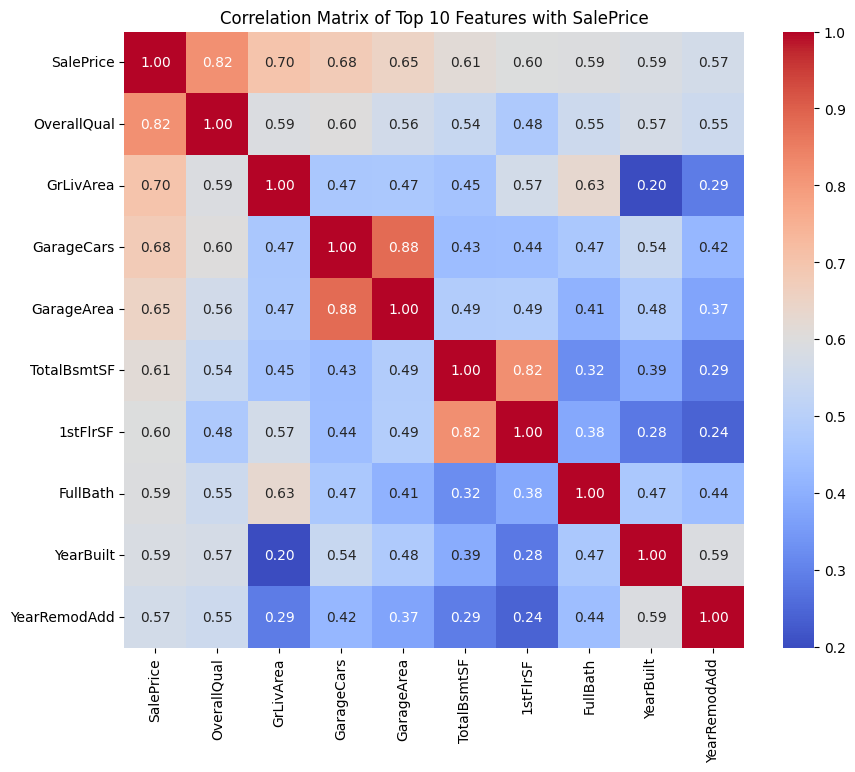

In [100]:
# Find the top 10 features most correlated with SalePrice

corrmat = train_df.corr(numeric_only=True)
#there are object columns as well so passing only the numeric ones

top_corr_features = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
#extracting top 10 highly correlated features with 'SalePrice'
#SalePrice.index gives column names

top_corr_matrix = train_df[top_corr_features].corr()
#Subsets the dataset to only the top correlated features

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#annot=True---Writes numbers inside each cell
#fmt='.2f'---Formats numbers to 2 decimal places
plt.title('Correlation Matrix of Top 10 Features with SalePrice')
plt.show()

**Insight:** The heatmap shows that `OverallQual` (Overall Quality), `GrLivArea` (Above Ground Living Area), and `GarageCars`/`GarageArea` are the most positively correlated features with `SalePrice`. This makes intuitive sense—better quality, larger houses with bigger garages tend to be more expensive.

### Step 5: Data Preprocessing & Feature Engineering
This is the most intensive part of the project. We will handle missing values, create new features, and encode categorical variables to prepare the data for modeling.

In [101]:
# Combine train and test data for consistent preprocessing
all_data = pd.concat((train_df.loc[:,:'SaleCondition'],
                      test_df.loc[:,:'SaleCondition']))

print(f"Combined data shape: {all_data.shape}")

Combined data shape: (2919, 79)


Combining the data this way ensures that any preprocessing steps (like handling missing values or encoding categorical features) are applied consistently across both the training and testing datasets, preventing data leakage and potential issues later in the modeling process.

#### 5.1 Handling Missing Values

In [102]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
#missing_data = missing_data[missing_data > 0]
# This includes missing_data=0
print("Features with missing values:")
print(missing_data)

Features with missing values:
PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
                 ... 
EnclosedPorch       0
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
Length: 79, dtype: int64


In [103]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print("Features with missing values:")
print(missing_data)

Features with missing values:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
Utilities          2
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
Exterior2nd        1
BsmtFinSF2         1
dtype: int64


In [104]:
# Impute numerical features with 0
numerical_cols_to_impute_zero = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
for col in numerical_cols_to_impute_zero:
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(0)

In [105]:
# Check missing values in numerical columns after imputation with 0
all_data[numerical_cols_to_impute_zero].isna().sum()

,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
GarageCars,0
GarageArea,0
BsmtFullBath,0
BsmtHalfBath,0


In [106]:
all_data['LotFrontage'].value_counts()

,count
LotFrontage,
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
...,...
155.0,1
126.0,1
200.0,1


In [107]:
# Impute LotFrontage with the median of the neighborhood
if 'LotFrontage' in all_data.columns and all_data['LotFrontage'].isna().any():
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* **all_data.groupby('Neighborhood'):** This groups the DataFrame by the Neighborhood column. The assumption here is that houses in the same neighborhood tend to have similar LotFrontage values.
* **.transform(lambda x: x.fillna(x.median())):** This is the core imputation step. For each neighborhood group (x represents the LotFrontage Series for that group), it calculates the median of the existing LotFrontage values in that group (x.median()) and then fills the missing values (x.fillna(...)) within that same group with that calculated median. The transform function ensures that the result has the same index as the original DataFrame, allowing it to be assigned back to the LotFrontage column.

In [108]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print("Features with missing values:")
print(missing_data)

Features with missing values:
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MSZoning           4
Utilities          2
Functional         2
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [109]:
all_data['Alley'].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [110]:
all_data['Electrical'].value_counts()

,count
Electrical,
SBrkr,2671
FuseA,188
FuseF,50
FuseP,8
Mix,1


In [111]:
all_data['Fence'].value_counts()

,count
Fence,
MnPrv,329
GdPrv,118
GdWo,112
MnWw,12


In [112]:
# Impute categorical features with 'None' (for features where NA means 'no') or mode (for features where NA means missing data)
categorical_cols_to_impute_none = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in categorical_cols_to_impute_none:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna('None')

for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [113]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print("Features with missing values:")
print(missing_data)

Features with missing values:
GarageYrBlt    159
dtype: int64


In [114]:
# Based on the likely remaining missing values (GarageYrBlt), impute the remaining numerical features.
# GarageYrBlt can be imputed with 0 (assuming 0 means no garage, consistent with GarageArea/Cars=0)
if 'GarageYrBlt' in all_data.columns:
    all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)


print("\nMissing values after all imputation:", all_data.isna().sum().sum())


Missing values after all imputation: 0


#### 5.2 Feature Engineering

In [115]:
# Create a total square footage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalSF']

,TotalSF
Id,
1,2566.0
2,2524.0
3,2706.0
4,2473.0
5,3343.0
...,...
2915,1638.0
2916,1638.0
2917,2448.0


In [116]:
# Create a total bathrooms feature
all_data['TotalBath'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                         all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
#A half bathroom typically has: Toilet + sink; No shower or bathtub---So it is considered half as valuable as a full bathroom. thats why 0.5 for half
all_data['TotalBath']

,TotalBath
Id,
1,3.5
2,2.5
3,3.5
4,2.0
5,3.5
...,...
2915,1.5
2916,1.5
2917,2.0


In [117]:
# Create a feature for age of the house at sale
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']
all_data['Age']

,Age
Id,
1,5
2,31
3,7
4,91
5,8
...,...
2915,36
2916,36
2917,46


#### 5.3 Categorical Encoding

#### **Theoretical Concept: Ordinal vs. Nominal Features**
To use categorical features in a model, we must convert them to numbers. The method depends on the type of feature:
1.  **Ordinal Features:** These have an inherent order (e.g., `Poor < Fair < Good < Excellent`). For these, we use **Label Encoding**, which assigns an integer to each category based on its order (e.g., `Poor=0, Fair=1, ...`).
2.  **Nominal Features:** These have no inherent order (e.g., `Neighborhood`). Using Label Encoding would imply a false order. Instead, we use **One-Hot Encoding**, which creates a new binary (0/1) column for each category.

In [118]:
all_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
categorical_cols = all_data.select_dtypes(include=['object']).columns

pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)
#This line converts categorical (text) columns into numeric columns using one-hot encoding, so that machine learning models can understand them.
#Why we need this?----Because ML models works with numbers
#pd.get_dummies()-----Performs one-hot encoding-----Creates new binary columns for each category

#drop_first=True ⭐ (VERY IMPORTANT)
#This removes the first category from each encoded column.
#Why?-------To avoid dummy variable trap (multicollinearity).

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,False,True,False,False,False,False,False


# drop_first=True ⭐ (VERY IMPORTANT)

This removes the first category from each encoded column.

**Why?**

To avoid dummy variable trap (multicollinearity).
.
.
.
.


When you use pd.get_dummies(Color), pandas creates:

Color_Red-----Color_Blue-----Color_Green

1---------------0----------------0

0---------------1----------------0

0---------------0----------------1


👉 Each row has exactly one 1.





# **Why is this a problem?**

Notice something important:

**If you know any two columns, you can always guess the third.**

Example:

If Color_Red = 0

and Color_Blue = 0

then Color_Green must be 1

# **4️⃣ What does drop_first=True do?**

It removes one category automatically.

Using drop_first=True, we get:

Color_Blue-----Color_Green

0----------------0   → Red

1----------------0   → Blue

0----------------1   → Green


👉 When both columns are 0, it means Red.

So:

Red is still there

Just not explicitly written

In [120]:
# Convert any remaining object columns to category type for one-hot encoding
categorical_cols = all_data.select_dtypes(include=['object']).columns
all_data = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)

print(f"Data shape after encoding: {all_data.shape}")

Data shape after encoding: (2919, 262)


### Step 6: Model Building & Training

In [121]:
# Separate the preprocessed data back into training and testing sets
X = all_data[:len(train_df)]
y = train_df['SalePrice'] # SalePrice was already log-transformed and is only in train_df
X_test_final = all_data[len(train_df):]

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # PRNG

#### **Theoretical Concept: Feature Scaling**
Many models, especially linear models and distance-based algorithms, perform better when numerical features are on a similar scale. **Standardization** (`StandardScaler`) is a common technique that transforms the data to have a mean of 0 and a standard deviation of 1. This prevents features with large scales (like `GrLivArea`) from dominating features with small scales (like `OverallQual`).

In [122]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
255,20,70.0,8400,5,6,1957,1957,0.0,922.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1067,60,59.0,7837,6,7,1993,1994,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
639,30,67.0,8777,5,7,1910,1950,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
800,50,60.0,7200,5,7,1937,1950,252.0,569.0,0.0,...,False,False,False,False,True,False,False,False,True,False
381,50,50.0,5000,5,6,1924,1950,0.0,218.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

## **Theoretical Concept: Linear Regression**
Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the features (independent variables) and the target variable (dependent variable).

The goal of Linear Regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values. This is known as the Ordinary Least Squares (OLS) method.

The equation for simple linear regression (one feature) is:
$$y = \beta_0 + \beta_1x + \epsilon$$
Where:
- $y$ is the target variable (SalePrice in our case)
- $x$ is the input feature
- $\beta_0$ is the y-intercept
- $\beta_1$ is the coefficient for the feature $x$ (representing the change in $y$ for a one-unit change in $x$)
- $\epsilon$ is the error term

For multiple linear regression (multiple features), the equation is:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$
Where $x_1, x_2, ..., x_n$ are the input features and $\beta_1, \beta_2, ..., \beta_n$ are their respective coefficients.

**Assumptions of Linear Regression:**
1. **Linearity:** The relationship between the features and the target variable is linear.
2. **Independence:** The observations are independent of each other.
3. **Homoscedasticity:** The variance of the errors is constant across all levels of the features.
4. **Normality:** The errors are normally distributed.
5. **No Multicollinearity:** The features are not highly correlated with each other.

While Linear Regression is simple and interpretable, it can be sensitive to outliers and may not perform well if the assumptions are violated or if the relationships are highly non-linear.

#### 6.1 Model 1: Linear Regression (Baseline)

In [124]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_val_scaled)

### **Theoretical Concept: XGBoost (Extreme Gradient Boosting)**
XGBoost is a highly efficient and popular gradient boosting algorithm. It's an optimized distributed gradient boosting library designed to be highly flexible, portable, and efficient.

**How it works:**
XGBoost builds trees sequentially. Each new tree attempts to correct the errors made by the previous trees. The predictions from all the trees are then summed up to get the final prediction.

**Key Features and Advantages:**
1. **Regularization:** Includes L1 and L2 regularization to prevent overfitting.
2. **Handling Missing Values:** Has a built-in mechanism to handle missing values.
3. **Tree Pruning:** Supports 'depth-first' and 'breadth-first' tree growth and pruning, which can improve performance and reduce overfitting.
4. **Parallel Processing:** Designed to be highly parallelizable, making it faster than traditional gradient boosting implementations.
5. **Flexibility:** Supports various objective functions and evaluation metrics.

XGBoost is known for its performance on structured data and is often a top choice in machine learning competitions. However, it can be more complex to tune and understand compared to simpler models like Linear Regression.

#### 6.2 Model 2: XGBoost (Advanced)

In [125]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', # Corrected objective function
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=3,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42)

# XGBoost can handle NaNs, but since we've cleaned the data, we can use the scaled data as well if preferred.
# However, XGBoost generally doesn't require scaling. We'll use the unscaled data as it's a tree-based model.
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_val)

### Step 7: Model Evaluation

#### **Theoretical Concept: Regression Metrics**
- **Mean Absolute Error (MAE):** The average absolute difference between the predicted and actual values. It's easy to interpret.
- **Mean Squared Error (MSE):** The average of the squared differences. It penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE):** The square root of MSE. It's the most common metric because it's in the same units as the target variable (in our case, log-price), making it more interpretable than MSE.
- **R-squared ($R^2$):** The proportion of the variance in the target variable that is predictable from the features. A value closer to 1 indicates a better fit.

In [126]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

# evaluate_model(y_val, y_pred_lr, "Linear Regression") # Commenting out Linear Regression evaluation as it failed

evaluate_model(y_val, y_pred_xgb, "XGBoost")
print('--'*25)
evaluate_model(y_val, y_pred_lr, "LinearRegression")

--- XGBoost Performance ---
RMSE: 0.1315
MAE:  0.0858
R-squared: 0.9073

--------------------------------------------------
--- LinearRegression Performance ---
RMSE: 0.1734
MAE:  0.0960
R-squared: 0.8389



### Step 8: Create Submission File

In [127]:
# Make predictions on the final test set using the best model (XGBoost)
# Use the unscaled test data for XGBoost prediction
final_predictions_log = xgbr.predict(X_test_final)

# IMPORTANT: We must reverse the log transformation to get the predictions back on the original price scale
final_predictions = np.expm1(final_predictions_log)

# Create the submission DataFrame
submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': final_predictions})

# Save to csv
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
submission.head()

Submission file 'submission.csv' created successfully.


,Id,SalePrice
0,1461,125996.656250
1,1462,166337.156250
2,1463,187915.328125
3,1464,197955.718750
4,1465,182225.312500


In [128]:
submission.shape

(1459, 2)

### Step 9: Conclusion

In this project, we successfully built an end-to-end regression pipeline to predict house prices.

**Key Steps Undertaken:**
1.  **Analyzed and transformed the target variable** (`SalePrice`) to handle its skewness.
2.  Conducted a **thorough EDA** to understand the key features influencing price.
3.  Implemented a **robust preprocessing strategy**, handling various types of missing data and encoding categorical features correctly.
4.  **Engineered new features** (`TotalSF`, `TotalBath`, `Age`) that provided more predictive power.
5.  **Trained and compared two models**, demonstrating the superior performance of XGBoost over a simple linear model.
6.  **Evaluated the models** using standard regression metrics and generated a final submission file.

**Potential Next Steps:**
- **Hyperparameter Tuning:** Use techniques like GridSearchCV to find the optimal parameters for the XGBoost model.
- **More Feature Engineering:** Create more complex features, such as interaction terms between key variables.
- **Ensemble Modeling:** Combine the predictions of several different models to potentially achieve even better results.